In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
p = lambda x: x**3 - 6*x**2 + 9*x + 10**-14
deltax = 10**-7
x = np.linspace(3-deltax, 3+deltax, 100)
y = p(x)
x2 = np.linspace(2, 4)
y2 = p(x2)


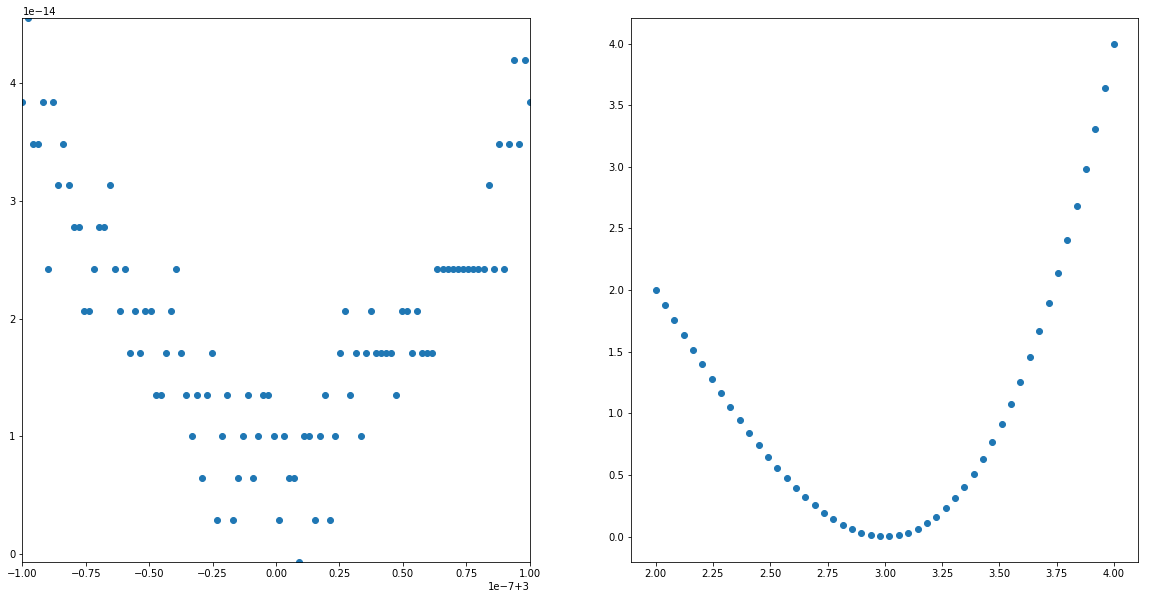

In [3]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
ax.scatter(x,y)
ax.set_ylim((min(y), max(y)))
ax.set_xlim((3-deltax, 3+deltax))
ax2 = fig.add_subplot(122)
ax2.scatter(x2,y2)
#ax2.set_ylim((min(y), max(y)))
#ax2.set_xlim((3-deltax, 3+deltax))
plt.show()

## Suche nullstelle von f(x)
$f(x) = x^6-x-1$

## mittels fixpunktierationen:
$ \phi_1 = x^6 -1 $   
$ \phi_2 = (x+1)^{\frac{1}{6}} $

In [4]:
f = lambda x: np.power(x,6) - x -1
phi1 = lambda x: np.power(x,6) -1
phi2 = lambda x: np.power((x+1),(1/6))

Dphi1 = lambda x: np.power(x,5)*6
Dphi2 = lambda x: (1/6)*np.power((x+1),(1/6 - 1))

### Iterationsvorschriften:

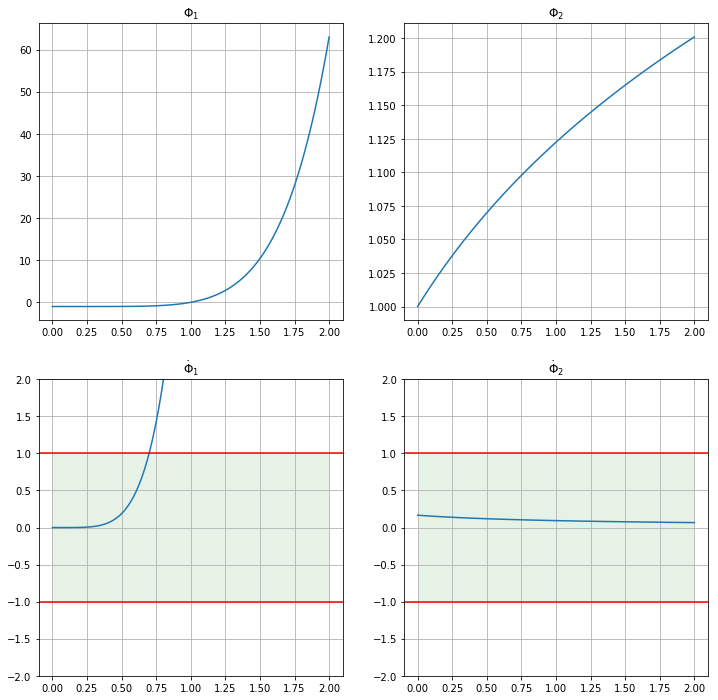

In [13]:
%matplotlib inline
x = np.linspace(0, 2, 100)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(221)
ax.plot(x,phi1(x))
ax.set_title('$\Phi_1$')
ax2 = fig.add_subplot(222)
ax2.plot(x,phi2(x))
ax2.set_title('$\Phi_2$')
ax3 = fig.add_subplot(223)
ax3.plot(x,Dphi1(x))
ax3.set_title('$\dot \Phi_1$')
ax4 = fig.add_subplot(224)
ax4.plot(x,Dphi2(x))
ax4.set_title('$\dot \Phi_2$')

axes = fig.get_axes()
[a.grid() for a in axes]
[a.set_ylim(-2,2) for a in axes[2:4]]
for a in axes[2:4]:
    a.axhline(1,color='r')
    a.axhline(-1,color='r')
    rectangle = plt.Rectangle((0,-1), 2, 2, fc='g',alpha=0.1)
    a.add_patch(rectangle)
plt.show()

In [6]:
def fixpunktiter(phi, x0, maxiter):
    xk = [x0]
    for k in range(0,maxiter):
        xk.append(phi(xk[k]))
    return xk

In [10]:
startwerte = [0.1,1,1.7]
farben = ['r','g','b']
phi = phi2
maxiter = 3
ergebnisse = [fixpunktiter(phi=phi, x0=x0, maxiter=maxiter) for x0 in startwerte]

print('Ergebnisse:')
pd.DataFrame(np.array(ergebnisse).T, columns=startwerte)


Ergebnisse:


,0.1,1.0,1.7
0,0.100000,1.000000,1.700000
1,1.016012,1.122462,1.180032
2,1.123955,1.133635,1.138703
3,1.133768,1.134628,1.135076


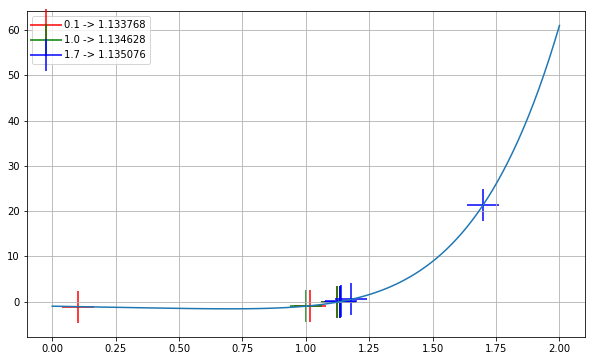

In [11]:
%matplotlib inline
x = np.linspace(0, 2, 100)
y = f(x)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(x,y)
for n in range(len(ergebnisse)):
    xk = ergebnisse[n]
    ax.scatter(xk,f(xk),color=farben[n], marker='+', s=1000,label='{:.1f} -> {:.6f}'.format(xk[0],xk[-1]))
ax.grid()
ax.legend(loc='best')
plt.show()